<h1>Reuters Full code along with the Flask

In [1]:
# importing libraries
from keras.datasets import reuters
import numpy as np 
from keras import models,utils
from keras import layers
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import reuters
(train_data, train_label),(test_data, test_label) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [3]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

Labels are the category from which the articel belongs

In [4]:
train_label

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

<h1> Preprocessing the data

reversing the firsts review

In [5]:
word_index = reuters.get_word_index()
reversed_word_index = dict([(value , key) for (key , value) in word_index.items()])
decoded_review = ' '.join([reversed_word_index.get(i -3 , '?') for i in train_data[0]])
decoded_review

550378/550378 [==============================] - 0s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

<h1>Vetorizing the data</h1>
<br>here we have defined the data which is converting the data into vector form

In [6]:
def vectorizing(sequence , dimension = 10000):
    result = np.zeros((len(sequence),dimension))
    for i , s in enumerate(sequence):
        result[i , s] = 1
    return result


In [7]:
x_train = vectorizing(train_data)
x_test = vectorizing(test_data)

In [8]:
print("Shape of x_train data" ,x_train.shape)
print("Shape of x_test data" ,x_test.shape)

Shape of x_train data (8982, 10000)
Shape of x_test data (2246, 10000)


for labels we are going to use one-hot encoding , for this we are going to use uitls function of keras

In [9]:
one_hot_train_label = utils.to_categorical(train_label)
one_hot_test_label = utils.to_categorical(test_label)

In [10]:
#now labels are also in the form of vectors
print(one_hot_test_label)
print("shape of labels ",one_hot_test_label.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of labels  (2246, 46)


<h1>Making the neural network

here we have to keep in mind that number of classification class are 46 , so in the last layer units will be 46 and activation function will be "softmax
"

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation = "relu",input_shape= (10000,)))
model.add(layers.Dense(64 , activation = "relu"))
model.add(layers.Dense(46 , activation = "softmax"))

as we are using softmax which is used in probability distribution so the best loss function will be categorical_crossentropy

separating some of the data fro validation purpose

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_label[:1000]
partial_y_trian = one_hot_train_label[1000:]

<h1>Feeding the network

In [57]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics='accuracy')
history = model.fit(partial_x_train,
                    partial_y_trian,
                    epochs=20,
                    batch_size=512,
                    validation_data= (x_val,y_val))


Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.4846 - accuracy: 0.5510 - val_loss: 1.6518 - val_accuracy: 0.6650
Epoch 2/20
16/16 [==============================] - 0s 31ms/step - loss: 1.3498 - accuracy: 0.7169 - val_loss: 1.2757 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 27ms/step - loss: 1.0115 - accuracy: 0.7813 - val_loss: 1.1526 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 0.7949 - accuracy: 0.8312 - val_loss: 1.0549 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 0s 25ms/step - loss: 0.6328 - accuracy: 0.8673 - val_loss: 0.9943 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.4995 - accuracy: 0.8970 - val_loss: 0.9647 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 0.4048 - accuracy: 0.9138 - val_loss: 0.9377 - val_accuracy: 0.8170
Epoch 8/20
16

<h1>checking about overfitting and underfitting

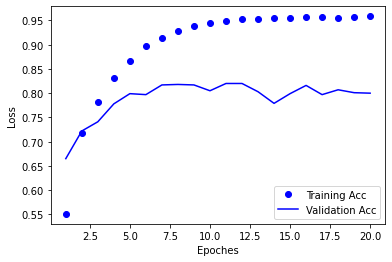

In [58]:
history_dic = history.history
accuracy_values = history_dic["accuracy"]
validation_accuracy = history_dic["val_accuracy"]
epochs = range(1, len(history_dic['accuracy'])+1)
plt.plot(epochs,accuracy_values,"bo", label = "Training Acc")
plt.plot(epochs,validation_accuracy,"b", label = "Validation Acc")
plt.xlabel("Epoches")
plt.ylabel('Loss')
plt.legend()
plt.show()

so from above graph we can see that validation accuracy is first decrease at 10 epoch

In [60]:
import pandas as pd
p = pd.DataFrame(history_dic)
p

,loss,accuracy,val_loss,val_accuracy
0,2.484611,0.550990,1.651831,0.665
1,1.349766,0.716863,1.275669,0.722
2,1.011530,0.781258,1.152619,0.741
3,0.794923,0.831245,1.054941,0.778
4,0.632773,0.867326,0.994266,0.799
5,0.499478,0.897018,0.964726,0.797
6,0.404842,0.913806,0.937744,0.817
7,0.331265,0.928339,0.936821,0.818
8,0.271938,0.939113,0.927609,0.817
9,0.231264,0.945252,0.991357,0.805


training the model till 9 epochs as till 9 epoch the loss 

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation = "relu",input_shape= (10000,)))
model.add(layers.Dense(64 , activation = "relu"))
model.add(layers.Dense(46 , activation = "softmax"))
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics='accuracy')
history = model.fit(partial_x_train,
                    partial_y_trian,
                    epochs=9,
                    batch_size=512,
                    validation_data= (x_val,y_val))
re = model.evaluate(x_test,one_hot_test_label)

Epoch 1/9
16/16 [==============================] - 1s 47ms/step - loss: 2.8009 - accuracy: 0.4955 - val_loss: 1.8338 - val_accuracy: 0.6250
Epoch 2/9
16/16 [==============================] - 1s 38ms/step - loss: 1.5266 - accuracy: 0.6818 - val_loss: 1.3994 - val_accuracy: 0.6810
Epoch 3/9
16/16 [==============================] - 1s 40ms/step - loss: 1.1646 - accuracy: 0.7477 - val_loss: 1.2072 - val_accuracy: 0.7340
Epoch 4/9
16/16 [==============================] - 0s 31ms/step - loss: 0.9475 - accuracy: 0.7978 - val_loss: 1.1113 - val_accuracy: 0.7550
Epoch 5/9
16/16 [==============================] - 0s 28ms/step - loss: 0.7848 - accuracy: 0.8295 - val_loss: 0.9949 - val_accuracy: 0.7810
Epoch 6/9
16/16 [==============================] - 0s 29ms/step - loss: 0.6510 - accuracy: 0.8582 - val_loss: 0.9424 - val_accuracy: 0.7950
Epoch 7/9
16/16 [==============================] - 0s 29ms/step - loss: 0.5382 - accuracy: 0.8831 - val_loss: 0.8951 - val_accuracy: 0.8030
Epoch 8/9
16/16 [===

again making the graph

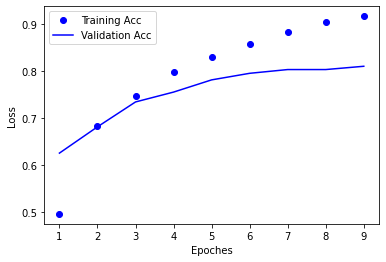

In [14]:
history_dic = history.history
accuracy_values = history_dic["accuracy"]
validation_accuracy = history_dic["val_accuracy"]
epochs = range(1, len(history_dic['accuracy'])+1)
plt.plot(epochs,accuracy_values,"bo", label = "Training Acc")
plt.plot(epochs,validation_accuracy,"b", label = "Validation Acc")
plt.xlabel("Epoches")
plt.ylabel('Loss')
plt.legend()
plt.show()

now it is better so we giv it new data to check

this give the probabilty of the given text to belong to some specific category

In [15]:
pre = model.predict(x_test)
for i in range(0,len(pre[0])):
    print(i, pre[0][i])

71/71 [==============================] - 0s 3ms/step
0 2.1291233e-05
1 0.00035671072
2 0.00013691135
3 0.84754235
4 0.14004757
5 0.0003902031
6 0.00024587888
7 6.94796e-06
8 0.0024906627
9 3.6328165e-05
10 0.00010319021
11 0.0008339743
12 7.4984106e-05
13 0.0010277223
14 0.00022525598
15 6.696559e-05
16 0.00089671294
17 0.00025098035
18 1.0300267e-05
19 0.0007650053
20 0.00060233154
21 0.000104803315
22 4.0804403e-05
23 0.00021218555
24 7.766293e-05
25 7.491056e-05
26 2.4544886e-05
27 6.387982e-05
28 0.00016808519
29 0.00016372568
30 0.00041436468
31 1.6413223e-05
32 4.5973193e-05
33 8.587739e-06
34 2.9657465e-06
35 1.563408e-06
36 0.00150794
37 9.741523e-05
38 3.2584798e-05
39 0.0006095142
40 1.3107058e-05
41 0.00016521702
42 1.6169233e-06
43 4.444549e-06
44 3.3199142e-06
45 1.2074544e-05


<h1> Saving the Model into pkl

In [108]:
from keras import models
model.save("Reuters.pkl")

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x0000024900B39C10>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x0000024900B39C10>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get 

np.argmax is giving the index with the highest probability

In [17]:
np.argmax(pre[0])

3

In [19]:
for i in pre[0]:
    print("{:.8f}".format(i))
print(0.49219209*100)

0.00002129
0.00035671
0.00013691
0.84754235
0.14004757
0.00039020
0.00024588
0.00000695
0.00249066
0.00003633
0.00010319
0.00083397
0.00007498
0.00102772
0.00022526
0.00006697
0.00089671
0.00025098
0.00001030
0.00076501
0.00060233
0.00010480
0.00004080
0.00021219
0.00007766
0.00007491
0.00002454
0.00006388
0.00016809
0.00016373
0.00041436
0.00001641
0.00004597
0.00000859
0.00000297
0.00000156
0.00150794
0.00009742
0.00003258
0.00060951
0.00001311
0.00016522
0.00000162
0.00000444
0.00000332
0.00001207
49.219209


<h1>This is the list of the categories along with the index</h1>
"Business and financial",
"aluminum market",
"barley market",
"balance of payments",
"meat markets",
'castor-oil market',
"cocoa industry",
"coconut market",
"coffee market",
"copper market",
"corn market",
"cotton market",
"consumer price index and inflation",
'crude market',
"german currency",
"US dollar foreign",
"German currency",
"earn",
'fuel market',
'gas market',
'gross prodcution',
'gold market',
'grain market',
'oil market',
'hog market',
"housing market",
"income n earning",
"interest rates",
"industrial production",
"iron-steel",
"jet market",
"jobs market",
"lead market",
"leading economy indicators",
"livestock market",
"lumber market",
"meal-feed",
"money-fx",
"nickel market",
"orange market",
"petro-chemical",
"platinum market",
"rapeseed",
"reserves bank",
"retail",
"rice market"

making the list of the categories

In [20]:
articlelist = ["Business and financial",
"aluminum market",
"barley market",
"balance of payments",
"meat markets",
'castor-oil market',
"cocoa industry",
"coconut market",
"coffee market",
"copper market",
"corn market",
"cotton market",
"consumer price index and inflation",
'crude market',
"german currency",
"US dollar foreign",
"German currency",
"earn",
'fuel market',
'gas market',
'gross prodcution',
'gold market',
'grain market',
'oil market',
'hog market',
"housing market",
"income n earning",
"interest rates",
"industrial production",
"iron-steel",
"jet market",
"jobs market",
"lead market",
"leading economy indicators",
"livestock market",
"lumber market",
"meal-feed",
"money-fx",
"nickel market",
"orange market",
"petro-chemical",
"platinum market",
"rapeseed",
"reserves bank",
"retail",
"rice market"]


making the dic of it

In [64]:
article_dic = {index : value for index , value in enumerate(articlelist)}
article_dic


{0: 'Business and financial',
 1: 'aluminum market',
 2: 'barley market',
 3: 'balance of payments',
 4: 'meat markets',
 5: 'castor-oil market',
 6: 'cocoa industry',
 7: 'coconut market',
 8: 'coffee market',
 9: 'copper market',
 10: 'corn market',
 11: 'cotton market',
 12: 'consumer price index and inflation',
 13: 'crude market',
 14: 'german currency',
 15: 'US dollar foreign',
 16: 'German currency',
 17: 'earn',
 18: 'fuel market',
 19: 'gas market',
 20: 'gross prodcution',
 21: 'gold market',
 22: 'grain market',
 23: 'oil market',
 24: 'hog market',
 25: 'housing market',
 26: 'income n earning',
 27: 'interest rates',
 28: 'industrial production',
 29: 'iron-steel',
 30: 'jet market',
 31: 'jobs market',
 32: 'lead market',
 33: 'leading economy indicators',
 34: 'livestock market',
 35: 'lumber market',
 36: 'meal-feed',
 37: 'money-fx',
 38: 'nickel market',
 39: 'orange market',
 40: 'petro-chemical',
 41: 'platinum market',
 42: 'rapeseed',
 43: 'reserves bank',
 44: '

then matching the index with the key of the dic to get the category to show

In [22]:
articlenumber = np.argmax(pre[2])
print("this articel belongs to this categoty ->",article_dic[articlenumber]," about ",pre[2][articlenumber]*100 ,"percent")


this articel belongs to this categoty -> aluminum market  about  76.35037899017334 percent


<h1>Code to give custome string

In [25]:
#loading the model for checking
from keras.models import load_model
m = load_model("E:\Mehroz Personals\PIAIC\Second Time Admission\AI\Quater 2\PIaic Learning\Deep Learning\Chapter3\Reuters Review\Reuters Implmented Fully\models\Reuters.pkl")

In [29]:
from keras.preprocessing.text import Tokenizer
def custome_data(text):
    max= 10000
    tok = Tokenizer(num_words=max)
    tok.fit_on_texts([text])
    s = tok.texts_to_sequences([text])
    x = vectorizing(s,dimension=max)
    p = m.predict(x)
    storing_the_index_of_highest_value = np.argmax(p)
    highes_value = p[0][storing_the_index_of_highest_value]
    print("this articel belongs to this categoty ->",article_dic[storing_the_index_of_highest_value]," about ",highes_value*100 ,"percent")
    print("\n",p,highes_value,storing_the_index_of_highest_value)



In [38]:
t = "War is a destructive and violent conflict between groups or nations. It often involves large-scale fighting and can result in significant loss of life, physical damage to infrastructure and property, and long-term social and economic consequences. Wars can be fought for a variety of reasons, such as the pursuit of power or resources, ideological differences, or the defense of national sovereignty. They can be sparked by a single event or issue, or can arise from long-standing tensions and historical grievances. The human cost of war can be immense, with civilians often bearing the brunt of the violence and displacement. Despite efforts to prevent war and promote peace, conflict continues to be a major challenge facing the world today."
custome_data(t)

1/1 [==============================] - 0s 21ms/step
this articel belongs to this categoty -> balance of payments  about  43.7539279460907 percent

 [[1.7884548e-04 9.2805764e-03 3.5359198e-04 4.3753928e-01 3.5680684e-01
  5.7588145e-04 1.1224701e-03 3.3356872e-04 7.2896862e-03 7.3355873e-04
  1.8137132e-03 2.0936880e-02 5.5720774e-04 1.2674523e-03 7.2255422e-04
  2.8347445e-04 6.6422641e-02 3.5832514e-04 2.4867987e-03 6.0634665e-02
  1.0106148e-02 5.0887780e-04 8.6641079e-04 5.9977785e-04 2.1569387e-03
  4.8346590e-04 9.9245422e-05 9.9792196e-05 5.8724673e-04 6.6092733e-04
  3.5344349e-04 2.8727013e-03 4.3180733e-04 3.1406307e-05 3.1783078e-03
  1.8931840e-05 4.1292268e-03 2.9553255e-04 2.7698741e-04 6.3008390e-04
  3.1150045e-04 1.3151213e-03 4.6912690e-05 1.3462320e-04 6.5614484e-05
  4.0963110e-05]] 0.43753928 3


In [73]:
def custome_data2(text):
    max= 10000
    tok = Tokenizer(num_words=max)
    tok.fit_on_texts([text])
    s = tok.texts_to_sequences([text])
    x = vectorizing(s,dimension=max)
    p = m.predict(x)
    for i in p[0]:
           print(round(i*100,2))
        

In [74]:
t = "War is a destructive and violent conflict between groups or nations. It often involves large-scale fighting and can result in significant loss of life, physical damage to infrastructure and property, and long-term social and economic consequences. Wars can be fought for a variety of reasons, such as the pursuit of power or resources, ideological differences, or the defense of national sovereignty. They can be sparked by a single event or issue, or can arise from long-standing tensions and historical grievances. The human cost of war can be immense, with civilians often bearing the brunt of the violence and displacement. Despite efforts to prevent war and promote peace, conflict continues to be a major challenge facing the world today."
custome_data2(t)

1/1 [==============================] - 0s 22ms/step
0.02
0.93
0.04
43.75
35.68
0.06
0.11
0.03
0.73
0.07
0.18
2.09
0.06
0.13
0.07
0.03
6.64
0.04
0.25
6.06
1.01
0.05
0.09
0.06
0.22
0.05
0.01
0.01
0.06
0.07
0.04
0.29
0.04
0.0
0.32
0.0
0.41
0.03
0.03
0.06
0.03
0.13
0.0
0.01
0.01
0.0


In [68]:
my_dict = {0: "value1", 1: "value2", 2: "value3"}

for key in my_dict:
    print(key, my_dict[key])


0 value1
1 value2
2 value3
